# Versuch 5
## Thermodynamische Größen aus EMK-Messungen
Zu Beginn werden alle für die Auswertung notwendigen Module importiert. Welche Module könntet ihr wie üblich für die Auswertung brauchen? Die allgemeinen bereits bekannten und vorausgetzten Python-Kompetenzen könnt ihr unter [Anforderungen.ipynb](Anforderungen.ipynb) nachlesen. Dort sind auch einige Ratschläge bspw. zum Exportieren von Grafiken oder Hinweise zu <code>NumPy</code> aufgeführt.

Falls euch nachträglich Module einfallen, könnt ihr diese jederzeit hier ergänzen. Achtet dabei aber darauf, den entsprechenden Code dann auch erneut auszuführen!

In [1]:
from Hilfsdateien.importe_Bibliotheken import *

Wenn ihr wollt, könnt ihr auch einige für die Auswertung notwendige Naturkonstanten bereits jetzt importieren von <code>scipy.constants</code>. Bedenkt, dass ihr diese Variablennamen nicht erneut nutzen solltet in der Auswertung! Sinnvoll wäre z.&nbsp;B. die Faradaykonstante $F$ .

Es ist sinnvoll, bereits jetzt etwaige Konstanten zu definieren, oder Werte für den studentschen $t$-Faktor einzutragen. Achtet wenn notwendig auf die Einheiten!

In [2]:
from Hilfsdateien.importe_Konstanten import *

### Erster Auswertungsschritt


Zu Beginn wollen wir unsere Messwerte in ein 3D-Array mit <code>numpy</code> einlesen. Es wird davon ausgegangen, dass es $n$ Messreihen mit $j$ Messwertepaare und $k$ Messgrößen gibt. Idealerweise sind eure Messwerte entsprechend in $n$ verschiedenen Dateien mit $j$ Zeilen und $k$ Spalten aufgeteilt. Entsprechend erstellen wir zunächst ein leeres Numpy-Array mit den entsprechenden Dimensionen.

In [3]:
n,j,k = 2,7,2
data_arr = np.empty((n,j,k))

Mittels <code>enumerate</code> kann sowohl ein Index als auch der Wert eines Elements in einem Array übertragen werden. Die erste Variable ist immer der Index und die Zweite der Eintrag im Array. Wir wollen enumerate über ein Array laufen lassen, welches die Pfade zu unseren Messwerten enthält. Welcher Befehl _generiert_ uns NumPy-Arrays aus bspw. txt-Dateien?

In [4]:
for index,element in enumerate(["Aufheizen_Rachuy_Kempken.txt","Abkühlen_Rachuy_Kempken.txt"]):
    data_arr[index] = np.genfromtxt("data_v5/"+element,usecols=(0,1),skip_header=1)

Zunächst ist es jedoch eure Aufgabe, Literaturwerte für die Standardbildungsenthalpie $\Delta H_\mathrm{f}^{⦵}$ bzw. -Entropie $\Delta S_\mathrm{f}^{⦵}$ zu finden. Diese sollt ihr nutzen, um nach dem Satz von Hess die Standardreaktionsenthalpie $\Delta H_\mathrm{r}^{⦵}$, -entropie $\Delta S_\mathrm{r}^{⦵}$ und -Gibbs-Energie $\Delta G_\mathrm{r}^{⦵}$ und aus Letzterem die $\mathrm{EMK}$ zu ermitteln. Wie müsst ihr hierzu vorgehen und welche wichtige Gleichung aus der Thermodynamik könnte euch helfen und wurde eine Standardzelle realisiert?

In [5]:
#Pb, PbCl2, Ag, AgCl
H_f = np.array([0,-359.41,0,-127.07])*1000
S_f = np.array([64.81,135.98,42.55,96.12])

H_r = H_f[1] - H_f[0] + 2*H_f[2] - 2*H_f[3]
S_r = S_f[1] - S_f[0] + 2*S_f[2] - 2*S_f[3]

G_r = H_r - 298.15*S_r

EMK_0 = G_r/(-2*F)
print(np.float32(EMK_0))

0.48994777


## Zweiter Auswertungsschritt
Als nächstes soll aus einer Auftragung der $\mathrm{EMK}$ gegen $T$ die Reaktionsentropie und Reaktions-Gibbs-Energie bestimmt werden. Idealerweise wird die lineare Regression über die Aufheiz- und Abkühlkurve zusammen durchgeführt. Hierzu können die 2D-Arrays _vertikal_ mit NumPy gestapelt (engl. _stacked_) werden. Mit welchem NumPy-Befehl könnte dies möglich sein? _Falls dies von eurem Assistenten nicht erwünscht ist und stattdessen getrennt die Werte bestimmt werden sollen, kann der nächste Codeblock übersprungen werden!_

In [6]:
stacked_arr = np.vstack((data_arr[0],data_arr[1]))

[[[14.5    0.428]
  [20.25   0.426]
  [25.75   0.425]
  [29.75   0.424]
  [35.25   0.422]
  [39.5    0.422]
  [44.5    0.421]]

 [[44.5    0.425]
  [39.5    0.426]
  [35.     0.427]
  [29.5    0.426]
  [25.     0.428]
  [20.25   0.429]
  [15.     0.43 ]]]
[[14.5    0.428]
 [20.25   0.426]
 [25.75   0.425]
 [29.75   0.424]
 [35.25   0.422]
 [39.5    0.422]
 [44.5    0.421]
 [44.5    0.425]
 [39.5    0.426]
 [35.     0.427]
 [29.5    0.426]
 [25.     0.428]
 [20.25   0.429]
 [15.     0.43 ]]


Über dieses gestapelte Array soll nun die lineare Regression stattfinden.

In [7]:
fit = linregress(stacked_arr[:,0]+273.15,stacked_arr[:,1])

Die Ausgleichsgerade und die Messwerte sollen nun gemeinsam aufgetragen werden. Achtet auf Achsenbeschriftungen, die Legende, Titel, etc.

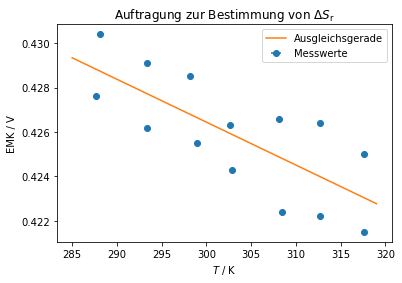

In [8]:
plt.errorbar(stacked_arr[:,0]+273.15,stacked_arr[:,1],xerr=np.array([0.005]*len(stacked_arr[:,0])),marker='o',ls="None",label="Messwerte")
x = np.arange(285,320)
plt.plot(x,x*fit.slope+fit.intercept,label="Ausgleichsgerade")
plt.xlabel("$T$ / K")
plt.ylabel("EMK / V")
plt.title("Auftragung zur Bestimmung von $\Delta S_\mathrm{r}$")
#plt.plot(data_arr[0,:,0],data_arr[0,:,1])
#plt.plot(data_arr[1,:,0],data_arr[1,:,1])
plt.legend()
plt.show()
plt.close()

Nach den im Skript gegebenen Gleichungen
\begin{align}
    \Delta_\mathrm{R} G &= -z\cdot F\cdot \mathrm{EMK} \\
    \Delta_\mathrm{R} S &= z\cdot F\cdot \left(\frac{\partial \mathrm{EMK}}{\partial T}\right)_p \\
    \Delta_\mathrm{R} H &= -z\cdot F\cdot\left(\mathrm{EMK}-T\cdot\left(\frac{\partial\mathrm{EMK}}{\partial T}\right)_p\right)
\end{align}
können die gewünschten Größen berechnet werden. Die Formeln solltet ihr nun mittels <code>sympy</code> implementieren. Deren Funktionsvariablen müssen zunächst als „Symbole“ definiert werden, damit SymPy diese als Variablen einer Funktion $f(a,b,c,\dots)$ interpretiert. Im Anschluss kann mit diesen Variablen $a,b,c,\dots$ ein Ausdruck erstellt werden. Dies ist nun für $\Delta_\mathrm{R} G$, $\Delta_\mathrm{R} H$, $\Delta_\mathrm{R} S$ eure Aufgabe.

In [9]:
z,m,dm,b,db,T,dT = symbols("z m Δm b Δb T ΔT")
Gr = -z*F*(m*T+b)
dGr = sqrt((diff(Gr,b)*db)**2 + (diff(Gr,m)*dm)**2 + (diff(Gr,T)*dT)**2)
Sr = z*F*m
dSr = sqrt((diff(Sr,m)*dm)**2)
Hr = -z*F*((m*T+b)-T*m)
dHr = sqrt((diff(Hr,m)*dm)**2 + (diff(Hr,b)*db)**2 + (diff(Hr,T)*dT)**2)

Nachdem wir die Ausdrücke definiert haben, müssen diese mittels eines weiteren SymPy-Befehls in aufrufbare Funktionen überführt werden (GIYF, eine [anonyme Funktion](https://de.wikipedia.org/wiki/Anonyme_Funktion) wird oftmals lambda-Funktion genannt!). An diese Funktionen können wir dann die jeweiligen Größen übergeben und erhalten $\Delta_\mathrm{R} G$, $\Delta_\mathrm{R} H$, $\Delta_\mathrm{R} S$ als Ergebnis.

In [10]:
G_r = lambdify([z,m,T,b],Gr,'scipy')
S_r = lambdify([z,m],Sr,'scipy')
H_r = lambdify([z,m,T,b],Hr,'scipy')
dG_r = lambdify([z,m,dm,T,dT,b,db],dGr,'scipy')
dS_r = lambdify([z,m,dm],dSr,'scipy')
dH_r = lambdify([z,m,dm,T,dT,b,db],dHr,'scipy')

gibbs = np.array([G_r(2,fit.slope,298.15,fit.intercept),dG_r(2,fit.slope,fit.stderr,298.15,0.005,fit.intercept,fit.intercept_stderr)])
entropie = np.array([S_r(2,fit.slope),dS_r(2,fit.slope,fit.stderr)])
enthalpie = np.array([H_r(2,fit.slope,298.15,fit.intercept),dH_r(2,fit.slope,fit.stderr,298.15,0.005,fit.intercept,fit.intercept_stderr)])

print("Gibbs: " + np.array2string(gibbs/1000,separator=" ± ") + " kJ/mol")
print("Entropie: " + np.array2string(entropie,separator=" ± ")+ " J/(k×mol)")
print("Enthalpie: " + np.array2string(enthalpie/1000,separator=" ± ")+" kJ/mol")

Gibbs: [-82.36  ±   4.046] kJ/mol
Entropie: [-37.289 ±   9.515] J/(k×mol)
Enthalpie: [-93.477 ±   2.885] kJ/mol


---
Arved Dorst, Göttingen, __2021__.